#### Data Preprocessing

In [477]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
df = pd.read_csv("Dataset/t20i_matches_Data.csv") # importing t20i_matches_Data dataset
df.head(5)

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [479]:
df.shape

(2592, 33)

In [480]:
df.index

RangeIndex(start=0, stop=2592, step=1)

In [481]:
df.columns

Index(['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name',
       'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)',
       'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2',
       'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner',
       'Match Result Text', 'MOM Player', 'Team1 Playing 11',
       'Team2 Playing 11', 'Debut Players'],
      dtype='object')

In [482]:
# feature selection

df_selected = df[['Match ID','Match Date','Team1 ID', 'Team1 Name','Team1 Captain','Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec', 'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored','Team2 Wickets Fell', 'Team2 Extras Rec','Match Venue (Country)','Match Venue (Stadium)','Toss Winner', 'Toss Winner Choice','MOM Player', 'Match Winner' ]]
df_selected

,Match ID,Match Date,Team1 ID,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 ID,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner
0,291356,2008-02-01,6,India,7593,74.0,10.0,3.0,2,Australia,8876,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,8876.0,Australia
1,300436,2008-02-07,1,England,2314,193.0,8.0,4.0,5,New Zealand,10384,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,2314.0,England
2,361531,2008-08-04,30,Scotland,45548,107.0,8.0,6.0,15,Netherlands,4192,110.0,5.0,5.0,Ireland,Civil Service Cricket Club,Netherlands,bowl,45358.0,Netherlands
3,354459,2008-08-04,26,Kenya,2265,106.0,9.0,6.0,30,Scotland,45548,107.0,1.0,4.0,Ireland,Civil Service Cricket Club,Kenya,bat,45548.0,Scotland
4,361653,2008-10-10,9,Zimbabwe,45326,106.0,8.0,6.0,8,Sri Lanka,6315,107.0,5.0,9.0,Canada,Maple Leaf North-West Ground,Sri Lanka,bowl,50377.0,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,1431610,2024-05-05,207,Thailand,116897,145.0,9.0,11.0,142,Indonesia,96720,128.0,5.0,13.0,Indonesia,Udayana Cricket Ground,Indonesia,bowl,116898.0,Thailand
2588,1425127,2024-05-05,9,Zimbabwe,52319,138.0,7.0,7.0,25,Bangladesh,70872,142.0,4.0,9.0,Bangladesh,Zahur Ahmed Chowdhury Stadium,Bangladesh,bowl,91227.0,Bangladesh
2589,1431611,2024-05-06,142,Indonesia,96720,117.0,8.0,6.0,207,Thailand,116897,122.0,4.0,12.0,Indonesia,Udayana Cricket Ground,Indonesia,bat,116897.0,Thailand
2590,1431120,2024-05-07,36,Japan,61172,199.0,5.0,27.0,166,Mongolia,115925,33.0,10.0,8.0,Japan,Sano International Cricket Ground,Japan,bat,95193.0,Japan


In [483]:
df_selected.shape

(2592, 20)

In [484]:
df_selected.columns

Index(['Match ID', 'Match Date', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Country)',
       'Match Venue (Stadium)', 'Toss Winner', 'Toss Winner Choice',
       'MOM Player', 'Match Winner'],
      dtype='object')

In [485]:
df_selected.isnull().sum() # checking null values

Match ID                   0
Match Date                11
Team1 ID                   0
Team1 Name                 0
Team1 Captain              0
Team1 Runs Scored         13
Team1 Wickets Fell        13
Team1 Extras Rec          13
Team2 ID                   0
Team2 Name                 0
Team2 Captain              0
Team2 Runs Scored         50
Team2 Wickets Fell        50
Team2 Extras Rec          50
Match Venue (Country)      0
Match Venue (Stadium)      0
Toss Winner                1
Toss Winner Choice        10
MOM Player               301
Match Winner              98
dtype: int64

In [486]:
df_cleaned = df_selected.dropna() #dropping null values
df_cleaned.isnull().sum()

Match ID                 0
Match Date               0
Team1 ID                 0
Team1 Name               0
Team1 Captain            0
Team1 Runs Scored        0
Team1 Wickets Fell       0
Team1 Extras Rec         0
Team2 ID                 0
Team2 Name               0
Team2 Captain            0
Team2 Runs Scored        0
Team2 Wickets Fell       0
Team2 Extras Rec         0
Match Venue (Country)    0
Match Venue (Stadium)    0
Toss Winner              0
Toss Winner Choice       0
MOM Player               0
Match Winner             0
dtype: int64

In [487]:
df_cleaned.shape

(2249, 20)

In [488]:
df_cleaned = df_cleaned.drop_duplicates(subset=['Match ID']) # dropping duplicate values
df_cleaned.shape

(2249, 20)

In [489]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2249 entries, 0 to 2591
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match ID               2249 non-null   int64  
 1   Match Date             2249 non-null   object 
 2   Team1 ID               2249 non-null   int64  
 3   Team1 Name             2249 non-null   object 
 4   Team1 Captain          2249 non-null   int64  
 5   Team1 Runs Scored      2249 non-null   float64
 6   Team1 Wickets Fell     2249 non-null   float64
 7   Team1 Extras Rec       2249 non-null   float64
 8   Team2 ID               2249 non-null   int64  
 9   Team2 Name             2249 non-null   object 
 10  Team2 Captain          2249 non-null   int64  
 11  Team2 Runs Scored      2249 non-null   float64
 12  Team2 Wickets Fell     2249 non-null   float64
 13  Team2 Extras Rec       2249 non-null   float64
 14  Match Venue (Country)  2249 non-null   object 
 15  Match Ven

In [490]:
df_cleaned['MOM Player'] = df_cleaned['MOM Player'].astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2249 entries, 0 to 2591
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match ID               2249 non-null   int64  
 1   Match Date             2249 non-null   object 
 2   Team1 ID               2249 non-null   int64  
 3   Team1 Name             2249 non-null   object 
 4   Team1 Captain          2249 non-null   int64  
 5   Team1 Runs Scored      2249 non-null   float64
 6   Team1 Wickets Fell     2249 non-null   float64
 7   Team1 Extras Rec       2249 non-null   float64
 8   Team2 ID               2249 non-null   int64  
 9   Team2 Name             2249 non-null   object 
 10  Team2 Captain          2249 non-null   int64  
 11  Team2 Runs Scored      2249 non-null   float64
 12  Team2 Wickets Fell     2249 non-null   float64
 13  Team2 Extras Rec       2249 non-null   float64
 14  Match Venue (Country)  2249 non-null   object 
 15  Match Ven

In [491]:
df_cleaned.head(2)

,Match ID,Match Date,Team1 ID,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 ID,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner
0,291356,2008-02-01,6,India,7593,74.0,10.0,3.0,2,Australia,8876,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,8876,Australia
1,300436,2008-02-07,1,England,2314,193.0,8.0,4.0,5,New Zealand,10384,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,2314,England


In [492]:
#getting number of unique values in each column

df_cleaned.nunique()

Match ID                 2249
Match Date               1279
Team1 ID                   99
Team1 Name                100
Team1 Captain             343
Team1 Runs Scored         219
Team1 Wickets Fell         11
Team1 Extras Rec           34
Team2 ID                   99
Team2 Name                100
Team2 Captain             337
Team2 Runs Scored         198
Team2 Wickets Fell         11
Team2 Extras Rec           34
Match Venue (Country)      59
Match Venue (Stadium)     199
Toss Winner               100
Toss Winner Choice          2
MOM Player               1004
Match Winner               94
dtype: int64

In [493]:
#identifying duplicate team names

duplicate_teams =df_cleaned.groupby('Team1 ID').filter(lambda x: x['Team1 Name'].nunique() > 1)
duplicate_teams['Team1 Name'].unique()

array(['Swaziland', 'Eswatini'], dtype=object)

In [494]:
duplicate_teams =df_cleaned.groupby('Team2 ID').filter(lambda x: x['Team2 Name'].nunique() > 1)
duplicate_teams['Team2 Name'].unique()

array(['World-XI', 'ICC World XI'], dtype=object)

In [495]:
#replacing team names with same ids with the other name
df_cleaned['Team1 Name'] = df_cleaned['Team1 Name'].replace('Eswatini','Swaziland') 
df_cleaned['Team2 Name'] = df_cleaned['Team2 Name'].replace('World-XI','ICC World XI') 

In [496]:
df_cleaned.describe()

,Match ID,Team1 ID,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 ID,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,MOM Player
count,2.249000e+03,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000
mean,1.142605e+06,172.958204,59198.253891,149.786572,6.878168,9.431303,161.084482,59879.114273,128.052468,6.044909,8.265007,67393.268564
std,3.194160e+05,727.356777,27352.541319,40.016298,2.158800,5.154967,702.725940,28056.867186,36.190725,3.052074,5.098586,29005.299428
min,2.252630e+05,1.000000,2121.000000,10.000000,0.000000,0.000000,1.000000,2034.000000,13.000000,0.000000,0.000000,1988.000000
25%,1.117821e+06,7.000000,47352.000000,125.000000,5.000000,6.000000,7.000000,47352.000000,104.000000,3.000000,5.000000,49752.000000
50%,1.278681e+06,25.000000,53602.000000,151.000000,7.000000,9.000000,26.000000,53809.000000,130.000000,6.000000,7.000000,63224.000000
75%,1.344785e+06,108.000000,70405.000000,177.000000,9.000000,12.000000,112.000000,70872.000000,152.000000,9.000000,11.000000,94893.000000
max,1.431611e+06,6411.000000,116897.000000,278.000000,10.000000,41.000000,6411.000000,116897.000000,259.000000,10.000000,45.000000,117260.000000


In [497]:
dfp = df_cleaned

In [498]:
dfp.drop(['Team1 ID','Team2 ID'],axis=1,inplace=True)
dfp.head(2)

,Match ID,Match Date,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner
0,291356,2008-02-01,India,7593,74.0,10.0,3.0,Australia,8876,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,8876,Australia
1,300436,2008-02-07,England,2314,193.0,8.0,4.0,New Zealand,10384,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,2314,England


In [499]:
df_players = pd.read_csv('Dataset/players_info.csv') #importing players info dataset
df_players.head()

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600..."
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100..."
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900..."
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900..."


In [500]:
captains = df_players

In [501]:
captains.rename(columns = {'player_id' : 'Team1 Captain','player_name':'Team1 Captain Name'},inplace = True)
captains = captains[['Team1 Captain','Team1 Captain Name']]
captains

,Team1 Captain,Team1 Captain Name
0,93957,Avinash Pai
1,2182,Sherwin Campbell
2,48391,Tamim Iqbal
3,2198,Javed Omar
4,52290,Jason Roy
...,...,...
6696,115386,Rahul Chopra
6697,108290,Muhammad Zuhaib
6698,63120,Andrew Umeed
6699,97874,Scott Currie


In [502]:
dfp = pd.merge(dfp, captains, how = 'left',on = 'Team1 Captain')
dfp.head(2)

,Match ID,Match Date,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner,Team1 Captain Name
0,291356,2008-02-01,India,7593,74.0,10.0,3.0,Australia,8876,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,8876,Australia,MS Dhoni
1,300436,2008-02-07,England,2314,193.0,8.0,4.0,New Zealand,10384,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,2314,England,Paul Collingwood


In [503]:
captains.rename(columns = {'Team1 Captain' : 'Team2 Captain','Team1 Captain Name':'Team2 Captain Name'},inplace = True)
captains

C:\Users\User\AppData\Local\Temp\ipykernel_16868\2965644017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captains.rename(columns = {'Team1 Captain' : 'Team2 Captain','Team1 Captain Name':'Team2 Captain Name'},inplace = True)


,Team2 Captain,Team2 Captain Name
0,93957,Avinash Pai
1,2182,Sherwin Campbell
2,48391,Tamim Iqbal
3,2198,Javed Omar
4,52290,Jason Roy
...,...,...
6696,115386,Rahul Chopra
6697,108290,Muhammad Zuhaib
6698,63120,Andrew Umeed
6699,97874,Scott Currie


In [504]:
dfp = pd.merge(dfp, captains, how = 'left',on='Team2 Captain')
dfp.head(2)

,Match ID,Match Date,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner,Team1 Captain Name,Team2 Captain Name
0,291356,2008-02-01,India,7593,74.0,10.0,3.0,Australia,8876,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,8876,Australia,MS Dhoni,Michael Clarke
1,300436,2008-02-07,England,2314,193.0,8.0,4.0,New Zealand,10384,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,2314,England,Paul Collingwood,Brendon McCullum


In [505]:
mom = captains

In [506]:
mom.rename(columns = {'Team2 Captain' : 'MOM Player','Team2 Captain Name':'Man of the match'},inplace = True)
dfp = pd.merge(dfp,mom,how='left',on = 'MOM Player')
dfp.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_16868\4001552798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mom.rename(columns = {'Team2 Captain' : 'MOM Player','Team2 Captain Name':'Man of the match'},inplace = True)


,Match ID,Match Date,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain,Team2 Runs Scored,...,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,MOM Player,Match Winner,Team1 Captain Name,Team2 Captain Name,Man of the match
0,291356,2008-02-01,India,7593,74.0,10.0,3.0,Australia,8876,75.0,...,3.0,Australia,Melbourne Cricket Ground,India,bat,8876,Australia,MS Dhoni,Michael Clarke,Michael Clarke
1,300436,2008-02-07,England,2314,193.0,8.0,4.0,New Zealand,10384,143.0,...,3.0,New Zealand,Jade Stadium,England,bat,2314,England,Paul Collingwood,Brendon McCullum,Paul Collingwood
2,361531,2008-08-04,Scotland,45548,107.0,8.0,6.0,Netherlands,4192,110.0,...,5.0,Ireland,Civil Service Cricket Club,Netherlands,bowl,45358,Netherlands,Ryan Watson,Jeroen Smits,Ryan ten Doeschate
3,354459,2008-08-04,Kenya,2265,106.0,9.0,6.0,Scotland,45548,107.0,...,4.0,Ireland,Civil Service Cricket Club,Kenya,bat,45548,Scotland,Steve Tikolo,Ryan Watson,Ryan Watson
4,361653,2008-10-10,Zimbabwe,45326,106.0,8.0,6.0,Sri Lanka,6315,107.0,...,9.0,Canada,Maple Leaf North-West Ground,Sri Lanka,bowl,50377,Sri Lanka,Prosper Utseya,Mahela Jayawardene,Ajantha Mendis


In [507]:
dfp2 = dfp.drop(['Team1 Captain','Team2 Captain','MOM Player'],axis = 1)
dfp2.head(2)

,Match ID,Match Date,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,Match Winner,Team1 Captain Name,Team2 Captain Name,Man of the match
0,291356,2008-02-01,India,74.0,10.0,3.0,Australia,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,Australia,MS Dhoni,Michael Clarke,Michael Clarke
1,300436,2008-02-07,England,193.0,8.0,4.0,New Zealand,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,England,Paul Collingwood,Brendon McCullum,Paul Collingwood


In [508]:
df_final = dfp2[['Match ID','Match Date','Team1 Name','Team1 Captain Name','Team1 Runs Scored','Team1 Wickets Fell','Team1 Extras Rec','Team2 Name','Team2 Captain Name','Team2 Runs Scored','Team2 Wickets Fell','Team2 Extras Rec','Match Venue (Country)','Match Venue (Stadium)','Toss Winner','Toss Winner Choice','Match Winner','Man of the match']]
df_final.head(2)

,Match ID,Match Date,Team1 Name,Team1 Captain Name,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain Name,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,Match Winner,Man of the match
0,291356,2008-02-01,India,MS Dhoni,74.0,10.0,3.0,Australia,Michael Clarke,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,Australia,Michael Clarke
1,300436,2008-02-07,England,Paul Collingwood,193.0,8.0,4.0,New Zealand,Brendon McCullum,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,England,Paul Collingwood


#### Win/Loss Analysis

In [509]:
# creating a function to determine if a team is playing away or home

def home_or_away(team_name,venue_country):
    if team_name == venue_country:
        return 'Home'
    else:
        return 'Away'
    
# Applying the function to both Team1 and Team2

df_final['Team1_Home_Away'] = df_final.apply(lambda x: home_or_away(x['Team1 Name'], x['Match Venue (Country)']), axis = 1)
df_final['Team2_Home_Away'] = df_final.apply(lambda x: home_or_away(x['Team2 Name'], x['Match Venue (Country)']), axis = 1)

df_final.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_16868\1057294154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Team1_Home_Away'] = df_final.apply(lambda x: home_or_away(x['Team1 Name'], x['Match Venue (Country)']), axis = 1)
C:\Users\User\AppData\Local\Temp\ipykernel_16868\1057294154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Team2_Home_Away'] = df_final.apply(lambda x: home_or_away(x['Team2 Name'], x['Match Venue (Country)']), axis = 1)


,Match ID,Match Date,Team1 Name,Team1 Captain Name,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 Name,Team2 Captain Name,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Country),Match Venue (Stadium),Toss Winner,Toss Winner Choice,Match Winner,Man of the match,Team1_Home_Away,Team2_Home_Away
0,291356,2008-02-01,India,MS Dhoni,74.0,10.0,3.0,Australia,Michael Clarke,75.0,1.0,3.0,Australia,Melbourne Cricket Ground,India,bat,Australia,Michael Clarke,Away,Home
1,300436,2008-02-07,England,Paul Collingwood,193.0,8.0,4.0,New Zealand,Brendon McCullum,143.0,8.0,3.0,New Zealand,Jade Stadium,England,bat,England,Paul Collingwood,Away,Home


In [510]:
# creating a function to to filter teams
def team_matches(team):
    df_team = df_final[(df_final['Team1 Name']==team) | (df_final['Team2 Name']==team)]
    return df_team

In [511]:
aus_win = team_matches('Australia')[team_matches('Australia')['Match Winner'] == 'Australia']
aus_win_ratio = aus_win.shape[0]/team_matches('Australia').shape[0]
aus_win_ratio

0.5536723163841808

In [512]:
df_final['Team1 Name'].unique()

array(['India', 'England', 'Scotland', 'Kenya', 'Zimbabwe', 'Pakistan',
       'South Africa', 'Sri Lanka', 'Bangladesh', 'New Zealand',
       'Australia', 'West Indies', 'Netherlands', 'Bermuda', 'Canada',
       'Ireland', 'Afghanistan', 'Nepal', 'U.A.E.', 'Hong Kong', 'P.N.G.',
       'Oman', 'Bahrain', 'Maldives', 'Saudi Arabia', 'Kuwait', 'Qatar',
       'Vanuatu', 'Philippines', 'Mexico', 'Costa Rica', 'Belize',
       'Panama', 'Germany', 'Belgium', 'Nigeria', 'Ghana', 'Uganda',
       'Namibia', 'Botswana', 'Guernsey', 'Norway', 'Jersey', 'Denmark',
       'Thailand', 'Malaysia', 'Singapore', 'Cayman Is', 'U.S.A.',
       'Bulgaria', 'Rwanda', 'Bhutan', 'Iran', 'Isle of Man', 'Romania',
       'Greece', 'Serbia', 'Malta', 'France', 'Sweden', 'Gibraltar',
       'Portugal', 'Luxembourg', 'Hungary', 'Estonia', 'Cyprus',
       'Swaziland', 'Seychelles', 'Malawi', 'Lesotho', 'Italy',
       'Tanzania', 'Mozambique', 'Sierra Leone', 'Cameroon', 'Bahamas',
       'Argentina', 'Spai

In [513]:
# creating a dataframe of teams and their win ratios

teams = []
win_ratio = []
win_ratio_home = []
win_ratio_away = []

for team in df_final['Team1 Name'].unique():
    win_r = team_matches(team)[team_matches(team)['Match Winner'] == team].shape[0] / team_matches(team).shape[0]
    win_r_home = (team_matches(team)[team_matches(team)['Match Winner'] == team][(team_matches(team)[team_matches(team)['Match Winner'] == team]['Team1_Home_Away'] == 'Home') | (team_matches(team)[team_matches(team)['Match Winner'] == team]['Team2_Home_Away'] == 'Home')].shape[0]) / team_matches(team).shape[0]
    win_r_away = win_r - win_r_home
    
    teams.append(team)
    win_ratio.append(win_r)
    win_ratio_home.append(win_r_home)
    win_ratio_away.append(win_r_away )

df_win_r = pd.DataFrame({'Team':teams,'Win ratio':win_ratio, 'Win ratio - Home' : win_ratio_home, 'Win ratio - Away' : win_ratio_away})
df_win_r.head(2)

,Team,Win ratio,Win ratio - Home,Win ratio - Away
0,India,0.669903,0.495146,0.174757
1,England,0.535294,0.376471,0.158824


In [514]:
top_teams = ['Australia','India','England','Sri Lanka','South Africa','New Zealand','Pakistan','West Indies','Bangladesh','Afghanistan','Zimbabwe','Ireland','Netherlands','Scotland']

In [515]:
filtered_winr = df_win_r[df_win_r['Team'].isin(top_teams)]
filtered_winr

,Team,Win ratio,Win ratio - Home,Win ratio - Away
0,India,0.669903,0.495146,0.174757
1,England,0.535294,0.376471,0.158824
2,Scotland,0.472973,0.135135,0.337838
4,Zimbabwe,0.315789,0.203008,0.112782
5,Pakistan,0.612613,0.333333,0.279279
6,South Africa,0.572289,0.427711,0.144578
7,Sri Lanka,0.467033,0.269231,0.197802
8,Bangladesh,0.387097,0.322581,0.064516
9,New Zealand,0.546875,0.416667,0.130208
10,Australia,0.553672,0.418079,0.135593


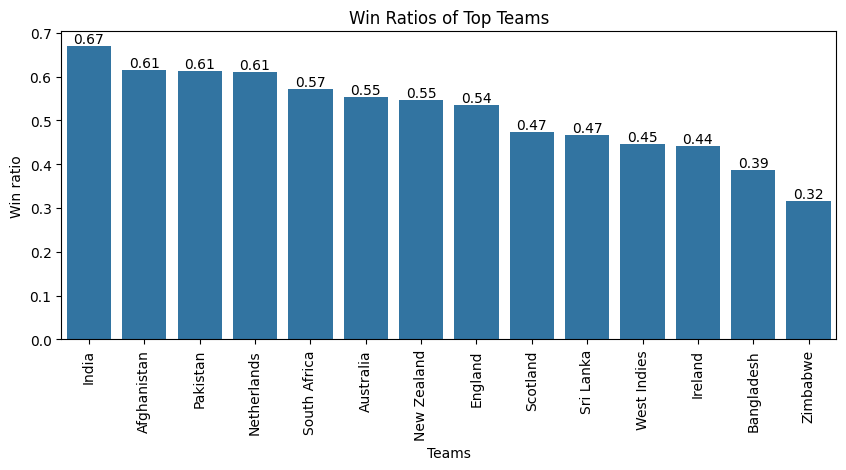

In [516]:
# plotting win percentages of top teams

filtered_winr_sorted = filtered_winr.sort_values(by='Win ratio', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x = 'Team', y='Win ratio',data = filtered_winr_sorted)
plt.xlabel('Teams')
plt.ylabel('Win ratio')
plt.title('Win Ratios of Top Teams')
plt.xticks(rotation=90)

# Adding data labels
for index, value in enumerate(filtered_winr_sorted['Win ratio']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [517]:
filtered_winr_home_away = filtered_winr_sorted.drop(columns = {'Win ratio'})
filtered_winr_home_away

,Team,Win ratio - Home,Win ratio - Away
0,India,0.495146,0.174757
16,Afghanistan,0.096491,0.517544
5,Pakistan,0.333333,0.279279
12,Netherlands,0.111111,0.500000
6,South Africa,0.427711,0.144578
10,Australia,0.418079,0.135593
9,New Zealand,0.416667,0.130208
1,England,0.376471,0.158824
2,Scotland,0.135135,0.337838
7,Sri Lanka,0.269231,0.197802


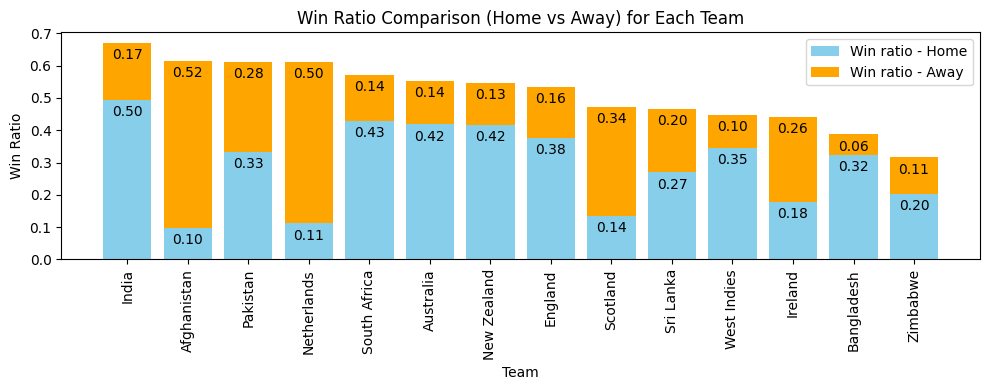

In [520]:
# plotting the stacked bar chart of home and away win ratios

fig, ax = plt.subplots(figsize=(10, 4))

# Stacked bar chart
bars_home = ax.bar(filtered_winr_home_away['Team'], filtered_winr_home_away['Win ratio - Home'], label='Win ratio - Home', color='skyblue')
bars_away = ax.bar(filtered_winr_home_away['Team'], filtered_winr_home_away['Win ratio - Away'], bottom=filtered_winr_home_away['Win ratio - Home'], label='Win ratio - Away', color='orange')

# Adding data labels for Home win ratios
for bar in bars_home:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height:.2f}', ha='center', color='black', fontsize=10)

# Adding data labels for Away win ratios
for bar in bars_away:
    height = bar.get_height()
    total_height = height + bar.get_y()
    ax.text(bar.get_x() + bar.get_width()/2, total_height - 0.05, f'{height:.2f}', ha='center', color='black', fontsize=10)

# Adding labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Win Ratio')
ax.set_title('Win Ratio Comparison (Home vs Away) for Each Team')

# Rotating x-axis labels for readability
plt.xticks(rotation=90)

# Adding legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()